# Is comedy dead? Rotten Tomatoes database EDA 

## Introduction

The main goal of this study is to determine whether people still enjoy comedy movies.

Questions to explore:

1. How have audience ratings for comedy movies changed over the years?
2. Are comedy movies rated higher or lower compared to other genres?
3. Do critics and audiences rate comedy movies differently?

4. Is the difference between critics' and audience ratings (e.g., critics vs. the public) for comedies larger than for other genres?
5. Which studios produce the highest-rated comedy movies?
6. Is the number of comedy releases in theaters and on streaming platforms decreasing?
7. Do longer comedy movies receive higher or lower ratings?

Statistical methods Used:
Descriptive Statistics, 
Shapiro-Wilk Test, 
Mann-Whitney U Test, 
Pearson Correlation
Data Visualization – Boxplots, scatterplot and histograms

## Exploratory Data Analysis

### Importing libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import pearsonr
import scipy.stats as stats

In [2]:
df = pd.read_csv(r'Rotten Tomatoes Movies.csv')

### Data cleaning

In [3]:
df['rating'] = df['rating'].str.replace('R)', 'R')
df['rating'] = df['rating'].str.replace('PG-13)', 'PG-13')

df['in_theaters_date'] = pd.to_datetime(df['in_theaters_date'])
df['on_streaming_date   '] = pd.to_datetime(df['on_streaming_date'])

### Basic data exploration

In [4]:
df.sample(5)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,on_streaming_date
9355,Mad Max: Fury Road,Filmmaker George Miller gears up for another p...,With exhilarating action and a surprising amou...,R,"Action & Adventure, Science Fiction & Fantasy",George Miller,"Brendan McCarthy, Nick Lathouris, George Miller","Tom Hardy, Charlize Theron, Nicholas Hoult, Ro...",2015-05-15,2015-09-01,120.0,Warner Bros.,Certified Fresh,97,410,85.0,127428.0,2015-09-01
11366,The Pride and the Passion,"Set in Spain during the early 1800s, this acti...",NaN,NR,"Action & Adventure, Classics, Drama","Stanley Kramer, Frank Kramer","Edna Anhalt, Edward Anhalt","Cary Grant, Sophia Loren, Frank Sinatra, Theod...",1957-01-01,2002-05-07,132.0,United Artists,Rotten,25,8,25.0,1635.0,2002-05-07
1872,24 City (Er shi si cheng ji),"Chengdu, nowadays. The state-owned factory 420...",One of China's most talented directors blurs t...,G,"Art House & International, Documentary, Drama",Zhangke Jia,"Zhangke Jia, Signe Baumane, Yongming Zhai","Joan Chen, Liping Lu, Tao Zhao, Chen Jianbin, ...",2008-05-17,2010-01-12,107.0,FilmsWeLike,Certified Fresh,91,43,71.0,1121.0,2010-01-12
12523,Shriek If You Know What I Did Last Friday the ...,Several of the biggest teen horror hits of the...,NaN,R,"Comedy, Horror",John Blanchard,"Sue Bailey, Joe Nelms","Tiffani Thiessen, Tom Arnold, Coolio, Julie Be...",2000-01-01,2001-11-06,86.0,Trimark,Rotten,14,7,31.0,19871.0,2001-11-06
9457,Man of the Century,Johnny Twenties (Gibson Frazier) is a man who ...,NaN,R,"Comedy, Drama",Adam Abraham,"Gibson Frazier, Adam Abraham","Gibson Frazier, Cara Buono, Brian Davies, Susa...",1999-10-29,2002-08-06,80.0,Sun-Telegram Pictures,Fresh,71,17,77.0,898.0,2002-08-06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   movie_title           16638 non-null  object        
 1   movie_info            16614 non-null  object        
 2   critics_consensus     8309 non-null   object        
 3   rating                16638 non-null  object        
 4   genre                 16621 non-null  object        
 5   directors             16524 non-null  object        
 6   writers               15289 non-null  object        
 7   cast                  16354 non-null  object        
 8   in_theaters_date      15823 non-null  datetime64[ns]
 9   on_streaming_date     16636 non-null  object        
 10  runtime_in_minutes    16483 non-null  float64       
 11  studio_name           16222 non-null  object        
 12  tomatometer_status    16638 non-null  object        
 13  tomatometer_rati

### Descriptive statistics for numerical data

I am only considering movies with more than 100,000 audience ratings to ensure data reliability and reduce noise from less popular films. Movies with very few ratings might not accurately reflect audience sentiment.

In [6]:
df = df[df['audience_count'] >= 100000]

In [7]:
df.describe(include=[np.number])

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
count,1934.000000,1934.000000,1934.000000,1934.000000,1.934000e+03
mean,109.702172,56.816960,137.985522,65.634436,1.200525e+06
std,20.770772,27.083699,76.475375,18.743684,5.172878e+06
min,2.000000,0.000000,5.000000,16.000000,1.003720e+05
25%,95.000000,34.000000,74.000000,52.000000,1.740745e+05
50%,106.000000,58.000000,133.500000,67.000000,2.701710e+05
75%,120.000000,81.000000,189.000000,81.750000,4.481585e+05
max,222.000000,100.000000,454.000000,98.000000,3.579764e+07


In [8]:
df.corr(numeric_only=True)

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
runtime_in_minutes,1.000000,0.284444,0.338456,0.339766,0.091935
tomatometer_rating,0.284444,1.000000,0.232548,0.738962,0.077489
tomatometer_count,0.338456,0.232548,1.000000,0.137532,0.091901
audience_rating,0.339766,0.738962,0.137532,1.000000,0.008716
audience_count,0.091935,0.077489,0.091901,0.008716,1.000000


## Questions

### Question 1: How have audience ratings for comedy movies changed over the years?

In [10]:
df['is_comedy'] = np.where(df['genre'].str.contains('Comedy'), 1, 0)
df['in_theaters_year'] = pd.to_datetime(df['in_theaters_date'], errors='coerce').dt.year

print(f"There are {len(df['is_comedy'])} comedies in the dataset.")

There are 1934 comedies in the dataset.


In [11]:
audience_ratings = df.groupby('in_theaters_year')[['audience_rating']].mean()

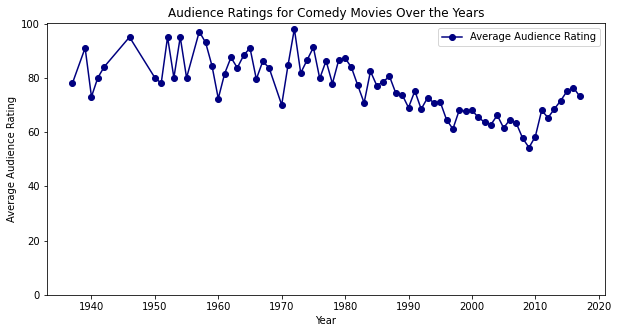

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(audience_ratings.index, audience_ratings.values, marker='o', color='navy', linestyle='-', label='Average Audience Rating')

plt.title('Audience Ratings for Comedy Movies Over the Years')
plt.xlabel('Year')
plt.ylim(0)
plt.ylabel('Average Audience Rating')

plt.legend()
plt.show()

<i><b>Answer: Yes, movie ratings have changed over the years. The average ratings declined from the 1970s until the late 2000s, when they started to rise again.</b></i>

### Question 2: Are comedy movies rated higher or lower compared to other genres?

In [13]:
rating_summary = df.groupby('is_comedy')[['audience_rating', 'tomatometer_rating']].mean().rename(index={0: 'Non-Comedy', 1: 'Comedy'})
rating_summary

,audience_rating,tomatometer_rating
is_comedy,,
Non-Comedy,67.534884,59.747764
Comedy,63.030637,52.801471


In [14]:
comedy_audience_ratings = df[df['is_comedy'] == 1]['audience_rating'].dropna()
non_comedy_audience_ratings = df[df['is_comedy'] == 0]['audience_rating'].dropna()

comedy_critics_ratings = df[df['is_comedy'] == 1]['tomatometer_rating'].dropna()
non_comedy_critics_ratings = df[df['is_comedy'] == 0]['tomatometer_rating'].dropna()

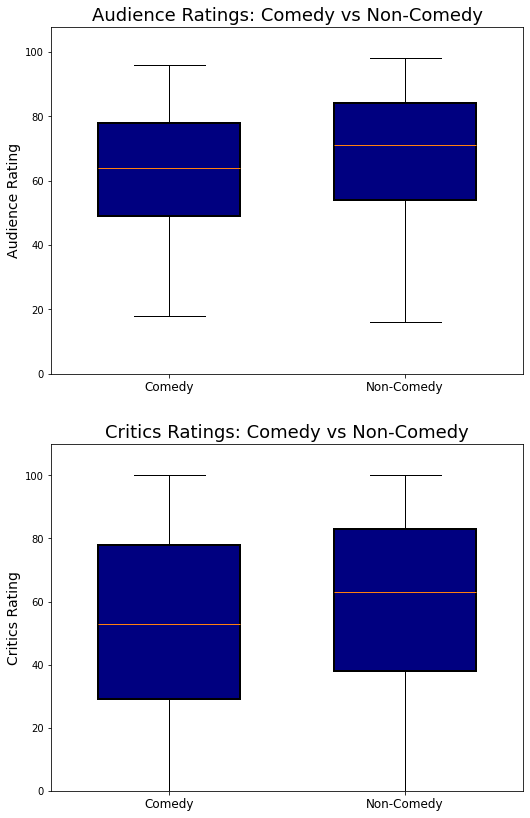

In [15]:
plt.figure(figsize=(8,12))

plt.subplot(2,1,1)
plt.boxplot([comedy_audience_ratings, non_comedy_audience_ratings], vert=True, patch_artist=True, 
            boxprops=dict(facecolor="navy", linewidth=2), widths=0.6)  # Szersze boxploty
plt.xticks([1, 2], ["Comedy", "Non-Comedy"], fontsize=12)
plt.ylabel("Audience Rating", fontsize=14)
plt.title("Audience Ratings: Comedy vs Non-Comedy", fontsize=18)
plt.ylim(0, max(comedy_audience_ratings.max(), non_comedy_audience_ratings.max()) * 1.1)  # Osie OY od zera

plt.subplot(2,1,2)
plt.boxplot([comedy_critics_ratings, non_comedy_critics_ratings], vert=True, patch_artist=True, 
            boxprops=dict(facecolor="navy", linewidth=2), widths=0.6)  # Szersze boxploty
plt.xticks([1, 2], ["Comedy", "Non-Comedy"], fontsize=12)
plt.ylabel("Critics Rating", fontsize=14)
plt.title("Critics Ratings: Comedy vs Non-Comedy", fontsize=18)
plt.ylim(0, max(comedy_critics_ratings.max(), non_comedy_critics_ratings.max()) * 1.1)  # Osie OY od zera

plt.tight_layout(pad=3)
plt.show()

To determine whether the ratings of comedy and non-comedy movies differ statistically, a two-sample mean test should be conducted. However, to choose the appropriate test, it is essential to first check for normality of distributions (Shapiro-Wilk test) and heteroskedasticity.

In [16]:
shapiro_comedy_audience = stats.shapiro(comedy_audience_ratings)
shapiro_non_comedy_audience = stats.shapiro(non_comedy_audience_ratings)

shapiro_comedy_critics = stats.shapiro(comedy_critics_ratings)
shapiro_non_comedy_critics = stats.shapiro(non_comedy_critics_ratings)

print("Shapiro-Wilk Test for Normality:")
print(f"Comedy Audience Ratings: p = {shapiro_comedy_audience.pvalue}")
print(f"Non-Comedy Audience Ratings: p = {shapiro_non_comedy_audience.pvalue}")
print(f"Comedy Critics Ratings: p = {shapiro_comedy_critics.pvalue}")
print(f"Non-Comedy Critics Ratings: p = {shapiro_non_comedy_critics.pvalue}\n")

Shapiro-Wilk Test for Normality:
Comedy Audience Ratings: p = 1.8384466581624359e-10
Non-Comedy Audience Ratings: p = 4.642756247656809e-18
Comedy Critics Ratings: p = 4.25098052184368e-15
Non-Comedy Critics Ratings: p = 6.434681791032066e-20



Shapiro-Wilk test results indicate that all p-values are extremely small (< 0.05), meaning we reject the null hypothesis that the data is normally distributed. This suggests that none of the rating distributions are normal.
There is no further point in checking heteroskedasticity, as the Mann-Whitney test will be used.

In [17]:
# Mann-Whitney U test for audience ratings
u_stat_audience, p_audience = stats.mannwhitneyu(comedy_audience_ratings, non_comedy_audience_ratings, alternative='two-sided')

# Mann-Whitney U test for critics ratings
u_stat_critics, p_critics = stats.mannwhitneyu(comedy_critics_ratings, non_comedy_critics_ratings, alternative='two-sided')

print(f"Mann-Whitney U test for Audience Ratings: U = {u_stat_audience}, p = {p_audience}")
print(f"Mann-Whitney U test for Critics Ratings: U = {u_stat_critics}, p = {p_critics}")

Mann-Whitney U test for Audience Ratings: U = 386195.5, p = 8.025736325754553e-09
Mann-Whitney U test for Critics Ratings: U = 388497.5, p = 2.43688403130755e-08


<i><b>Answer: The results of the Mann-Whitney U test show a significant difference in audience ratings between comedy and non-comedy films (U = 386,195.5, p < 0.001), as well as in critics' ratings (U = 388,497.5, p < 0.001). Since the p-values are well below the 0.05 threshold, we reject the null hypothesis, indicating that comedy and non-comedy films are rated differently by both audiences and critics. However, this test does not determine which genre receives higher ratings, only that their distributions differ.</b></i>

### Question 3: Do critics and audiences rate comedy movies differently?

<Figure size 720x432 with 0 Axes>

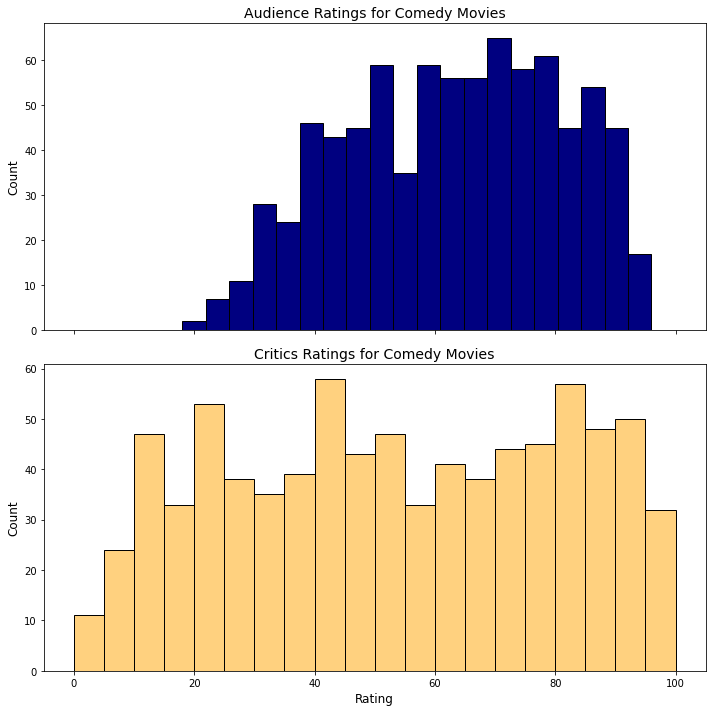

In [18]:
plt.figure(figsize=(10, 6))

fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

sns.histplot(comedy_audience_ratings, bins=20, color='navy', label='Audience Rating', alpha=1, ax=axes[0])
axes[0].set_title('Audience Ratings for Comedy Movies', fontsize=14)
axes[0].set_ylabel('Count', fontsize=12)

sns.histplot(comedy_critics_ratings, bins=20, color='orange', label='Critics Rating', alpha=0.5, ax=axes[1])
axes[1].set_title('Critics Ratings for Comedy Movies', fontsize=14)
axes[1].set_xlabel('Rating', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

Since we already know that both audience ratings and critics ratings do not follow a normal distribution, we need to use a non-parametric test. 
Given that we are comparing two dependent (paired) groups – audience ratings and critics ratings for the same movies – the appropriate test is the Wilcoxon Signed-Rank Test. 
This test evaluates whether there is a significant difference between the two related distributions without assuming normality.

In [19]:
wilcoxon_test = stats.wilcoxon(comedy_audience_ratings, comedy_critics_ratings)
print(f"Wilcoxon Signed-Rank Test: W = {wilcoxon_test.statistic}, p = {wilcoxon_test.pvalue}")

Wilcoxon Signed-Rank Test: W = 75533.0, p = 1.4244661412057102e-38


Since the p-value is far below 0.05, we reject the null hypothesis. This means that there is a statistically significant difference between audience ratings and critics ratings for comedy movies.

Despite the statistical differences between the ratings, a correlation between them may still exist. 
Due to the non-normality of the distributions, Spearman's rank correlation will be applied as it does not assume a linear relationship or normality, making it more suitable for the given data.

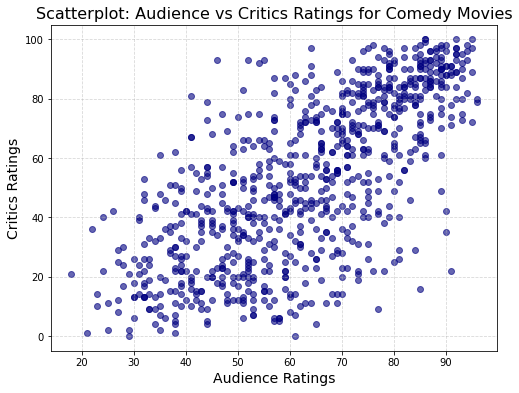

In [20]:
plt.figure(figsize=(8,6))

plt.scatter(comedy_audience_ratings, comedy_critics_ratings, color="navy", alpha=0.6)
plt.xlabel("Audience Ratings", fontsize=14)
plt.ylabel("Critics Ratings", fontsize=14)
plt.title("Scatterplot: Audience vs Critics Ratings for Comedy Movies", fontsize=16)
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

In [21]:
pearson_corr, p_value = pearsonr(comedy_audience_ratings, comedy_critics_ratings)

print(f"Pearson Correlation Coefficient: {pearson_corr:.3f}")
print(f"P-value: {p_value:.3e}")

Pearson Correlation Coefficient: 0.703
P-value: 1.843e-122


The Pearson correlation coefficient (ρ = 0.709) indicates a strong positive correlation between audience ratings and critics ratings for comedy movies. This suggests that, in general, higher audience ratings tend to be associated with higher critics ratings.

<i><b>Answer:
The analysis shows that audience ratings and critics ratings for comedy movies differ statistically. This means that, on average, audiences and critics rate comedy movies differently.
However, the Pearson correlation coefficient indicates a strong positive relationship between the two rating systems. This suggests that while there is a systematic difference in the way audiences and critics rate comedy movies, their scores still tend to follow a similar pattern.</i></b>